#Analysis of the Fitzhugh Nagumo Model

##No Extensions are performed (he says lying through his teeth)

###Import all necessary modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# need to clone and install from https://github.com/jakevdp/JSAnimation.git
from JSAnimation import IPython_display

from matplotlib import animation
from scipy.integrate import odeint
from scipy.signal import argrelextrema
%matplotlib inline

###Initialize Constants

In [2]:
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0 #ms
numpoints = 10*stoptime
times = np.linspace(0,stoptime,numpoints)

###Initialize Variables

In [3]:
alpha = 0.01;
beta = 0.5;
c = 0.1;
z = 0.5;

In [4]:
#ignore my stupid comments

#Derrivatives
def dV(V,W,alpha,z):
    return V*(alpha+V)*(1-V)-W+z
def dW(V,W,beta,c):
    return beta*V - c*W

#Nullclines
def nullV(alpha,V):
    return -V**3 + (1-alpha)*V**2 + alpha*V +z
def nullW(beta,c,V):
    return beta*V/c

#Bulk derrivative for ode solver
def derr_func(var,t,p):
    alpha,beta,c,z = p
    V, W = var
    f = [V*(alpha+V)*(1-V)-W+z, beta*V - c*W]
    return f

#calculate frequency of model
def calc_freq(t,V):
    peak_max = np.max(V[100:])
    
    peak_range = 0.9*peak_max 
    
    max_pts = argrelextrema(V,np.greater)[0]
    max_ranges = np.where(V[max_pts] >= peak_range)
    max_pts = max_pts[max_ranges]
    
    time_pts = t[max_pts]
    return 1.0/np.diff(time_pts)[-2]

###Sample Run of Model

In [6]:
#use ode solver
p = [alpha, beta, c, z]
w0 = [0,0]


wsol = odeint(derr_func, [0,0], times, args=([alpha,beta,c,z],),atol=abserr, rtol=relerr)
V = wsol[:,0]
W = wsol[:,1]

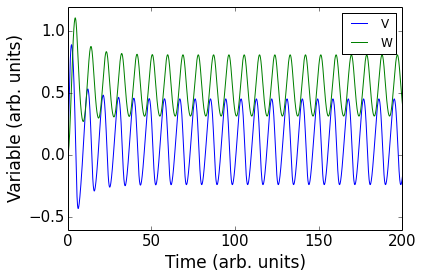

In [17]:
plt.plot(times,V)
plt.plot(times,W)
plt.xlabel('Time (arb. units)')
plt.ylabel('Variable (arb. units)')
plt.gca().yaxis.label.set_size(17)
plt.gca().xaxis.label.set_size(17)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(['V','W'])
plt.savefig('../TeX/images/model.png')

###Phase Plane

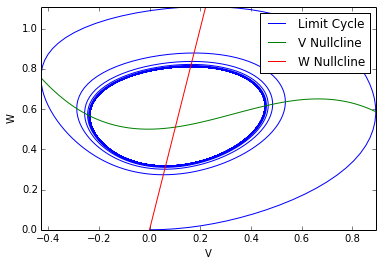

In [9]:
plt.plot(V,W)
Vs = np.linspace(min(V),max(V),100)
V_nullcline = nullV(alpha,Vs)
W_nullcline = nullW(beta,c,Vs)

plt.plot(Vs,V_nullcline)
plt.plot(Vs,W_nullcline)
plt.xlim([min(V),max(V)])
plt.ylim([min(W),max(W)])

plt.legend(['Limit Cycle','V Nullcline','W Nullcline'])
plt.xlabel('V')
plt.ylabel('W')

###Phase Plane Animation


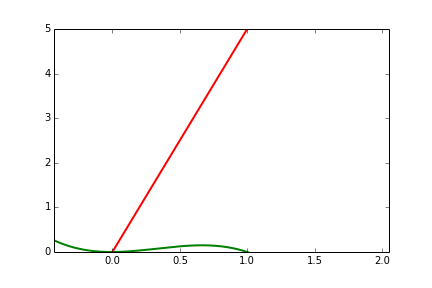
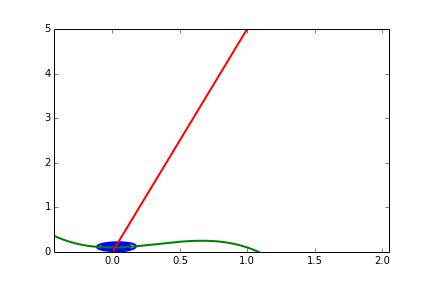
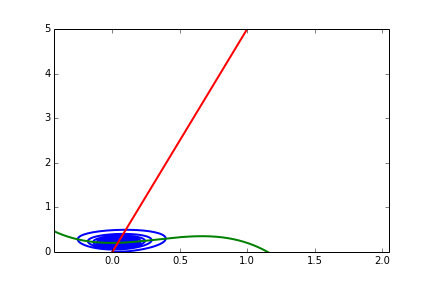
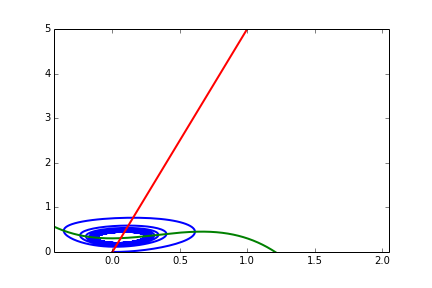
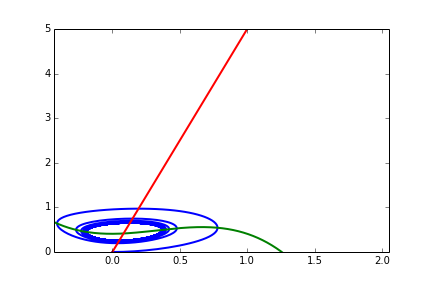
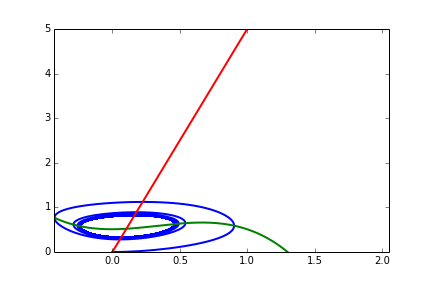
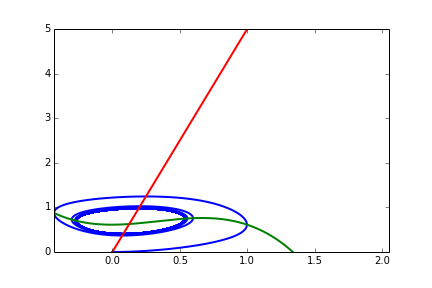
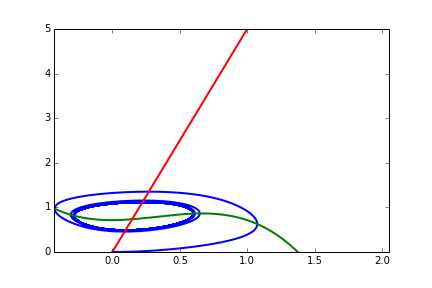
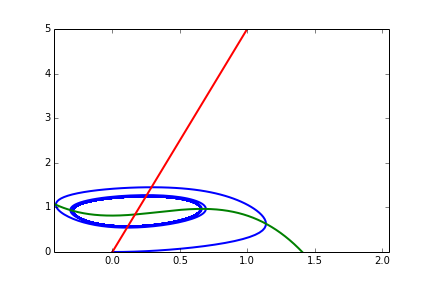
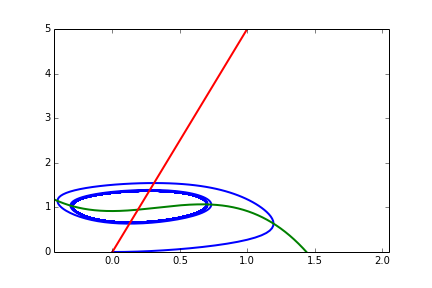
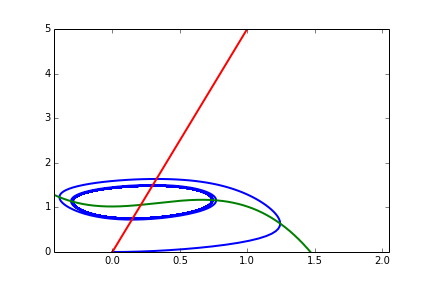
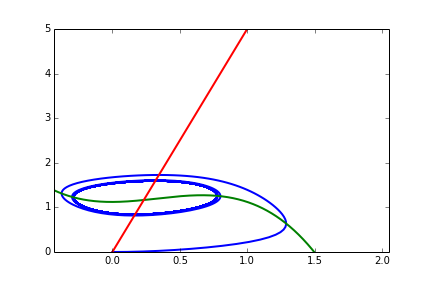
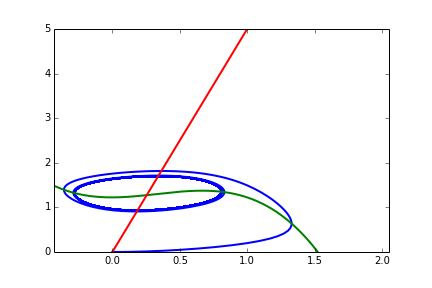
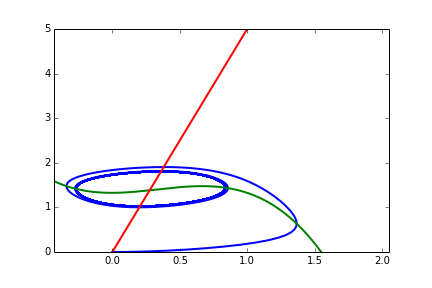
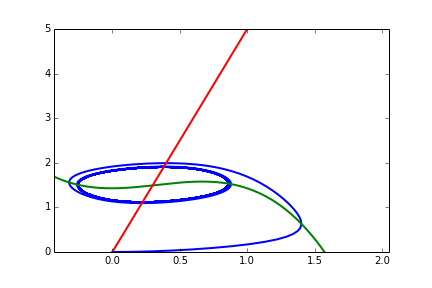
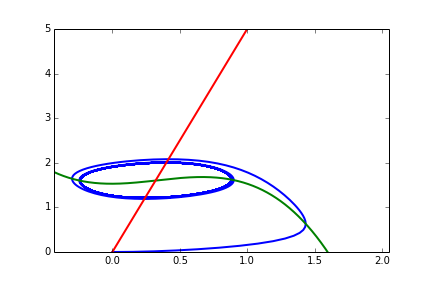
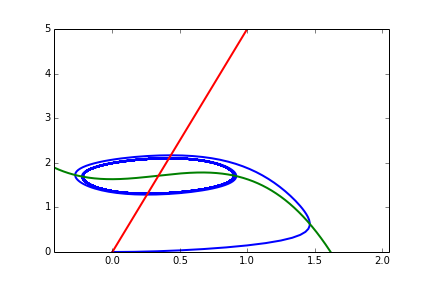
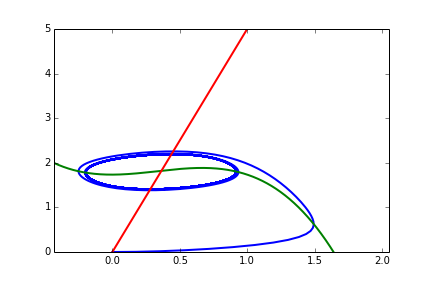
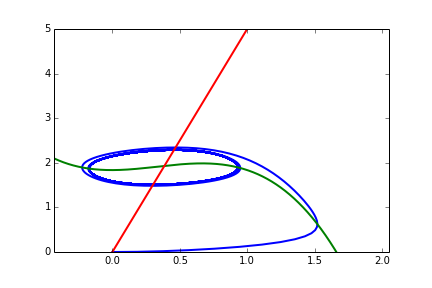
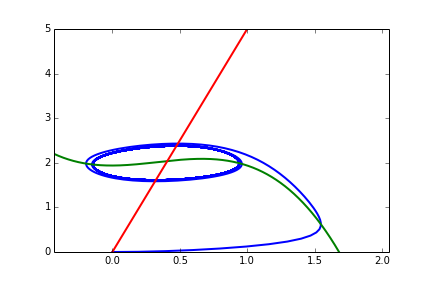
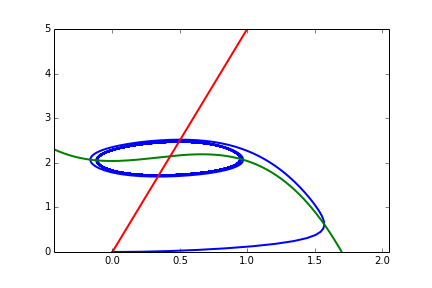
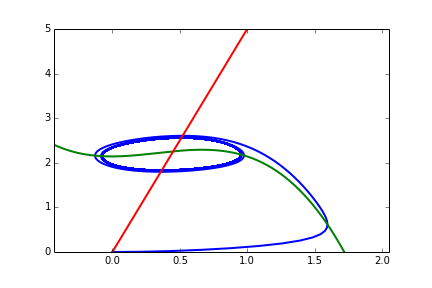
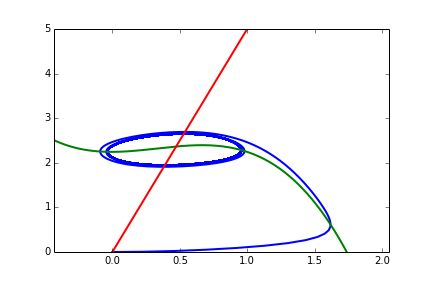
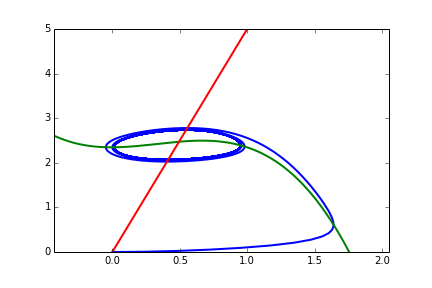
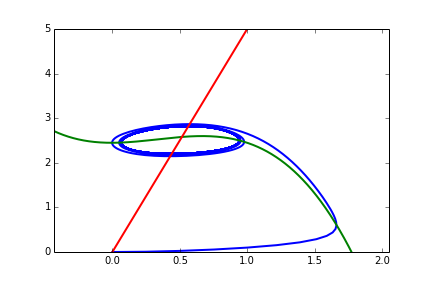
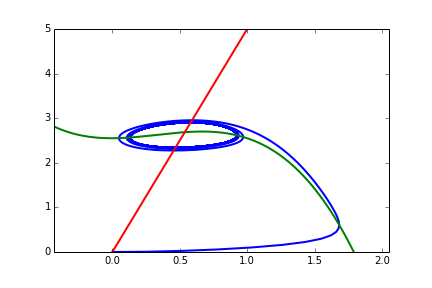
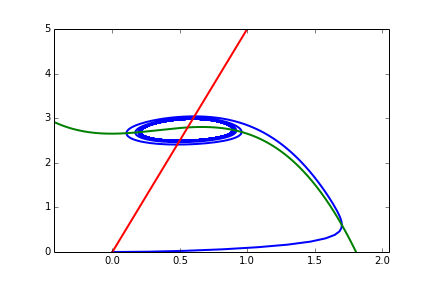
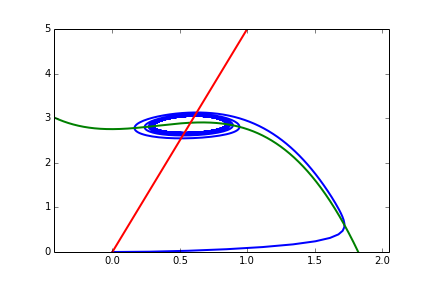
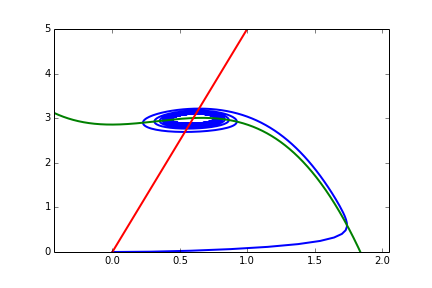
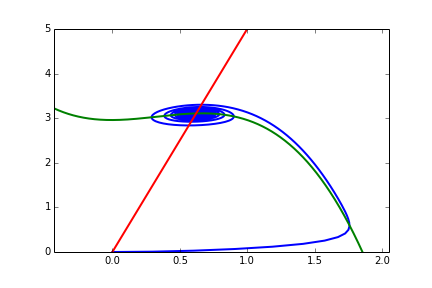
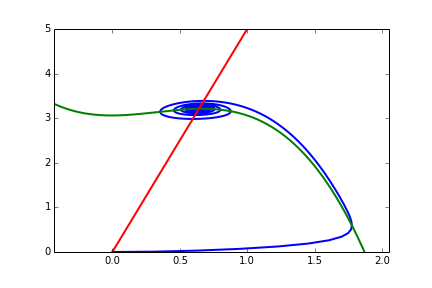
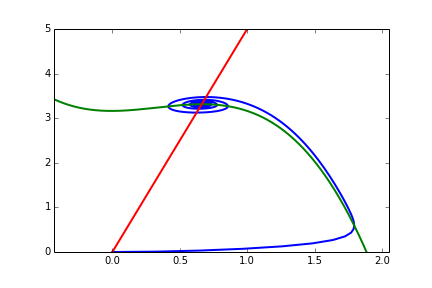
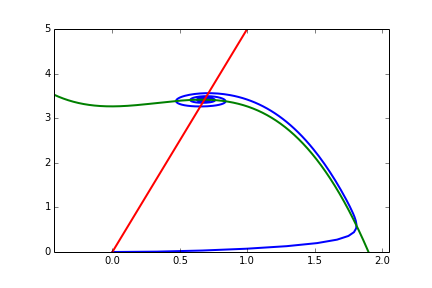
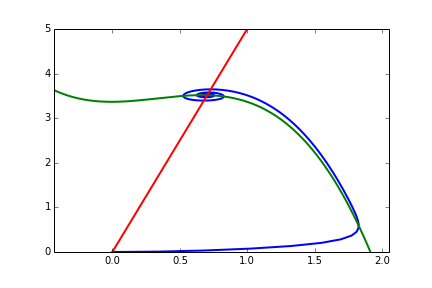
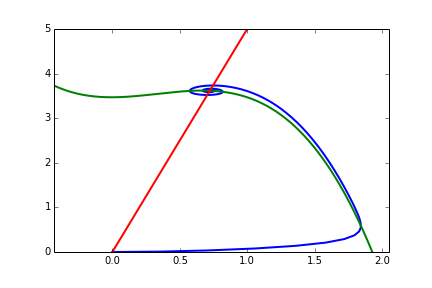
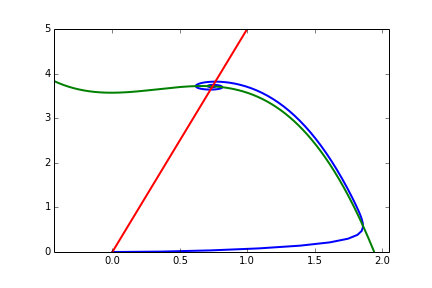
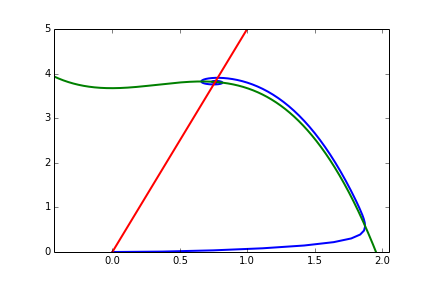
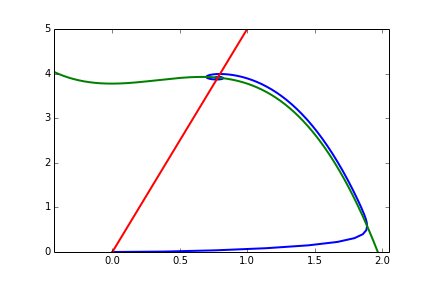
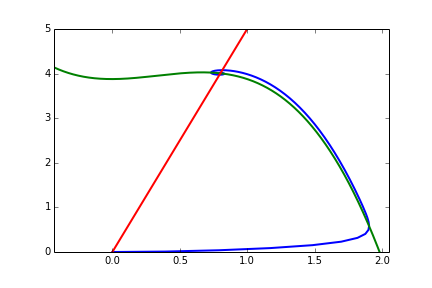
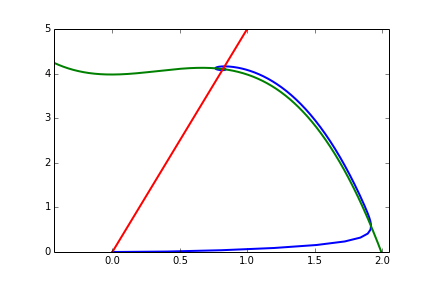
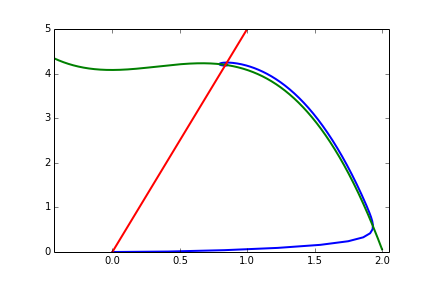
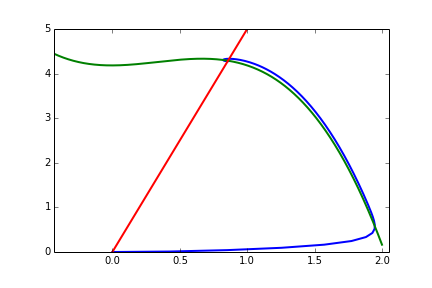
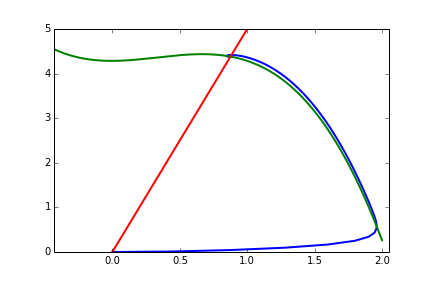
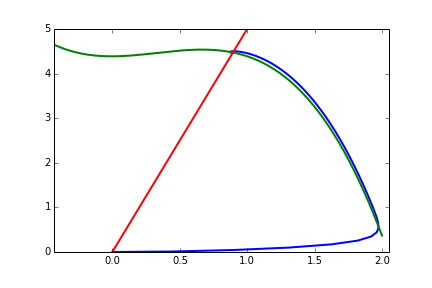
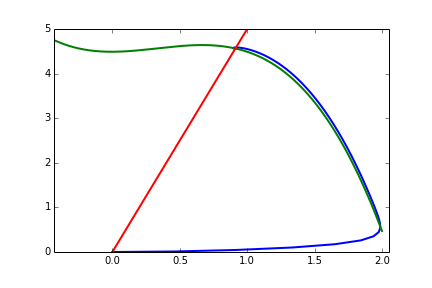
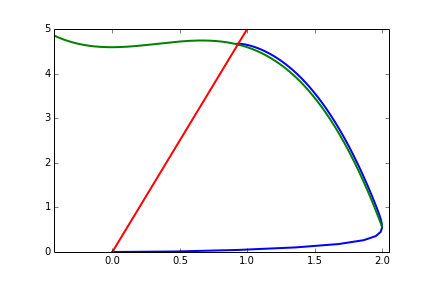
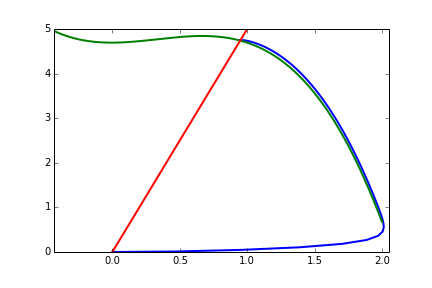
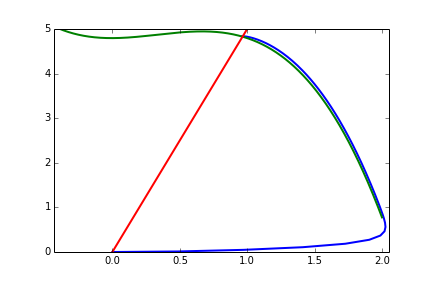
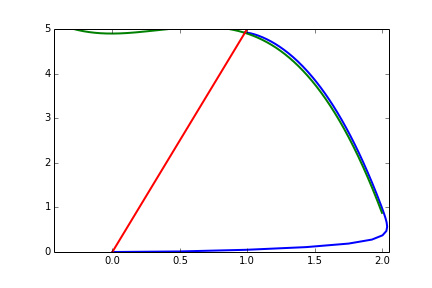
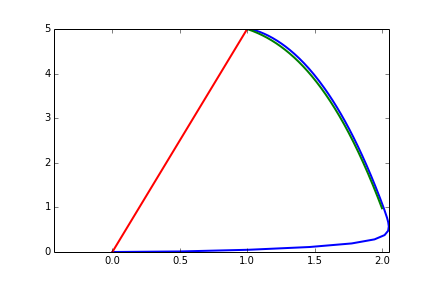

In [10]:
n_z = 50
zs = np.linspace(0,5,n_z)
V_loop = np.zeros((n_z,np.size(V)))
W_loop = np.zeros((n_z,np.size(W)))

null_Vs = np.linspace(-2,2,10000)
nullclines = np.zeros((2,n_z,len(null_Vs)))
for ix,z in enumerate(zs):
    wsol = odeint(derr_func, [0,0], times, args=([alpha,beta,c,z],),atol=abserr, rtol=relerr)
    V = wsol[:,0]
    W = wsol[:,1]
    V_loop[ix,:] = V
    W_loop[ix,:] = W
    nullclines[0,ix,:] = nullV(alpha,null_Vs)
    nullclines[1,ix,:] = nullW(beta,c,null_Vs)
    
#First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
V_lim = (np.min(np.min(V_loop)),np.max(np.max(V_loop)))
W_lim = (np.min(np.min(W_loop)),np.max(np.max(W_loop)))

ax = plt.axes(xlim=V_lim, ylim=W_lim)

lines = []
for i in [0,1,2]:
    lines.append(ax.plot([],[],lw=2)[0])
def init():
        lines[0].set_data([], [])
        lines[1].set_data([], [])
        lines[2].set_data([], [])
        return lines,

def animate(i):
    V = V_loop[i,:]
    W = W_loop[i,:]
    lines[0].set_data(V, W)
    lines[1].set_data(null_Vs,nullclines[0,i,:])
    lines[2].set_data(null_Vs,nullclines[1,i,:])
    return lines


animation.FuncAnimation(fig, animate, init_func=init,frames=n_z, interval=100, blit=True)

###Stability analysis at $z=0$

Taking the initial model

$$\begin{align}
f(x) &= \dot{V} = V(\alpha + V)(1-V) -W +z \\
g(x) &= \dot{W} = \beta V -cW
\end{align}
$$


We evaluate thejacobian matrix

$$
\overrightarrow{J} = \begin{bmatrix}
    \frac{\partial f}{\partial{V}} & \frac{\partial f}{\partial{W}} \\
    \frac{\partial g}{\partial{V}} & \frac{\partial g}{\partial{W}} \\
\end{bmatrix} = 
\begin{bmatrix}
    −2\alpha V+\alpha+(2−3V)V & -1 \\
    \beta & -c \\
\end{bmatrix}
$$

If we take $\alpha,\beta,c$ equal to 0.01,0.5,0.1, we get $\Rightarrow $
$$
\begin{bmatrix}
    −0.02V+(2−3V)V+0.01 & -1 \\
    0.5 & -0.1 \\    
\end{bmatrix}
$$

This implies that eigenvalues $\lambda_{1,2}$ may be complex or not. 

Eigenvalues 1 and 2 as follows

$$ \lambda_{1,2} \approx 0.5(-3V^2 - 1.98V \pm \sqrt{ 9V^4 + 11.88 V^3 + 3.2604 V^2 - 0.4356 V - 1.9879 } - 0.09) $$

with corresponding eigenvectors

$$ v_{1,2} \approx \begin{bmatrix} 0.11 + 1.98V - 3V^2 + \sqrt{ 9V^4 + 11.88 V^3 + 3.2604 V^2 - 0.4356 V - 1.9879} & 1 \\ 0.11 + 1.98V - 3V^2 - \sqrt{ 9V^4 + 11.88 V^3 + 3.2604 V^2 - 0.4356 V - 1.9879} & 1 \end{bmatrix} $$

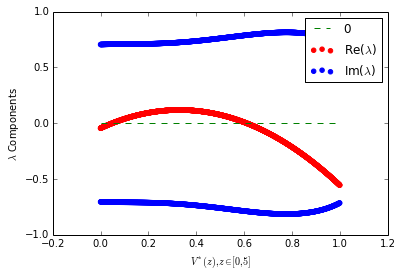

In [11]:
def eig12(v):
    v = v+0j
    e1 = 0.5*(-3*(v**2)+1.98*v + np.sqrt(9*(v**4) - 11.88*(v**3) + 3.2604*(v**2) - 0.4356*v - 1.9879) - 0.09)
    e2 = 0.5*(-3*(v**2)+1.98*v - np.sqrt(9*(v**4) - 11.88*(v**3) + 3.2604*(v**2) - 0.4356*v - 1.9879) - 0.09)
    return (e1,e2)

zs = np.linspace(0,5,1000)
v = np.zeros(len(zs))
for ix,z in enumerate(zs):
    coeff = [-1,(1-alpha),alpha-(beta)/c,z]
    r = np.roots(coeff)
    r = np.real(r[np.isreal(r)])
    v[ix] = r[0]
    
eigs = eig12(v)
v = np.concatenate((v,v))
zs = np.concatenate((zs,zs))
re = np.concatenate((np.real(eigs[0]),np.real(eigs[1])))
im = np.concatenate((np.imag(eigs[0]),np.imag(eigs[1])))
plt.scatter(v,re,label='Re($\lambda$)',color='red')
plt.scatter(v,im,label='Im($\lambda$)',color='blue')
plt.plot([min(v),max(v)],[0,0],'g--',label='0')
plt.legend()
plt.xlabel('$V^*(z), z\in[0,5]$')
plt.ylabel('$\lambda$ Components')

###Low Resolution Bifurcation diagram WRT $z$

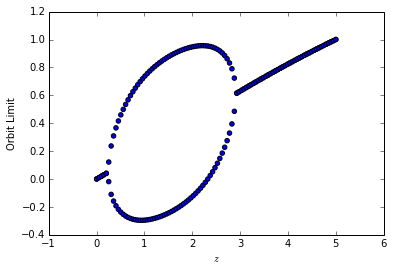

In [12]:
p = [alpha, beta, c, z]
w0 = [0,0]
times = np.linspace(0,5000,1000)
zs = np.linspace(0,5,100)
points = np.zeros((len(zs),2))
for ix,z in enumerate(zs):
    wsol = odeint(derr_func, [0,0], times, args=([alpha,beta,c,z],),atol=abserr, rtol=relerr)
    V = wsol[:,0]
    points[ix,:] = [min(V[500:]),max(V[500:])]

points_x = []
for z in zs:
    points_x.append(z)
    points_x.append(z)
plt.scatter(points_x,points)
plt.xlabel("$z$")
plt.ylabel("Orbit Limit")

###High Resolution Bifurcation diagram WRT $z$

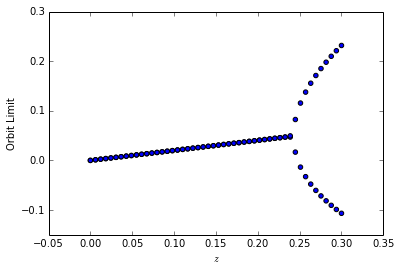

In [13]:
p = [alpha, beta, c, z]
w0 = [0,0]
times = np.linspace(0,10000,1000)
zs = np.linspace(0,0.3,50)                
points = np.zeros((len(zs),2))
for ix,z in enumerate(zs):
    wsol = odeint(derr_func, [0,0], times, args=([alpha,beta,c,z],),atol=abserr, rtol=relerr)
    V = wsol[:,0]
    points[ix,:] = [min(V[500:]),max(V[500:])]

points_x = []
for z in zs:
    points_x.append(z)
    points_x.append(z)
plt.scatter(points_x,points)
plt.xlabel('$z$')
plt.ylabel('Orbit Limit')

###2 Coupled Neurons

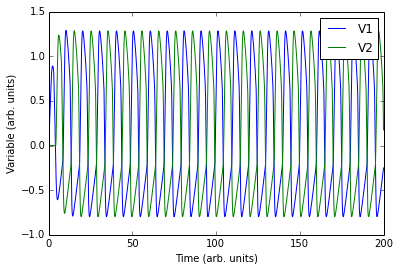

In [80]:
def derr_func_coup(var,t,p):
    alpha,beta,c,z,gamma = p
    V1,V2,W1,W2 = var
    G_bar = 1
    f = [V1*(alpha+V1)*(1-V1)-W1+z*(t<3)+G_bar*(1-gamma)*(V2<-0.3),
         V2*(alpha+V2)*(1-V2)-W2+G_bar*(1-gamma)*(V1<-0.3),
         beta*V1 - c*W1,
         beta*V2 - c*W2]
    return f


times = np.linspace(0,200,1000)
p = [alpha, beta, c, z,0]
w0 = [0,0,0,0]
wsol = odeint(derr_func_coup, [0,0,0,0], times, args=([alpha,beta,c,0.5,0],),atol=abserr, rtol=relerr)
V1 = wsol[:,0]
V2 = wsol[:,1]
plt.plot(times,V1)
plt.plot(times,V2)
plt.xlabel('Time (arb. units)')
plt.ylabel('Variable (arb. units)')
plt.legend(['V1','V2'])

###Coupling Animation


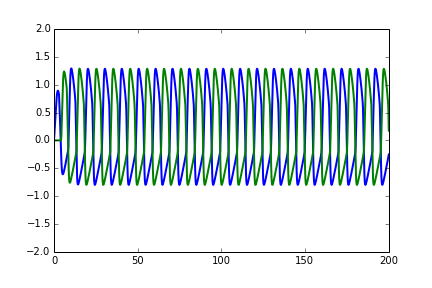
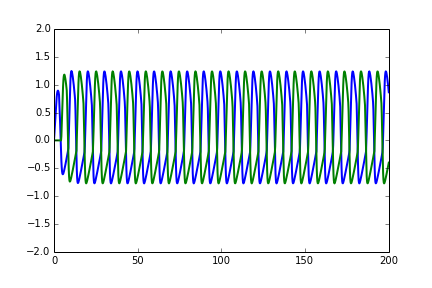
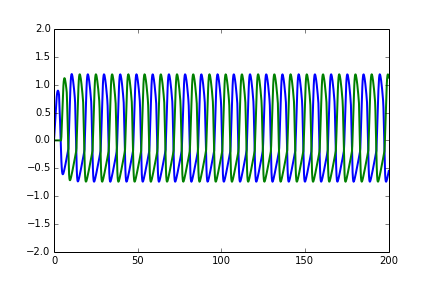
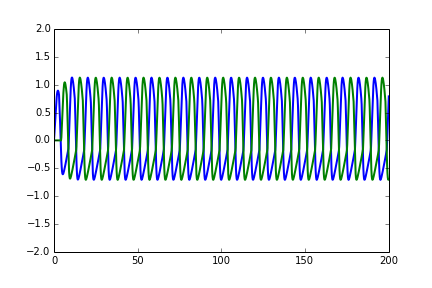
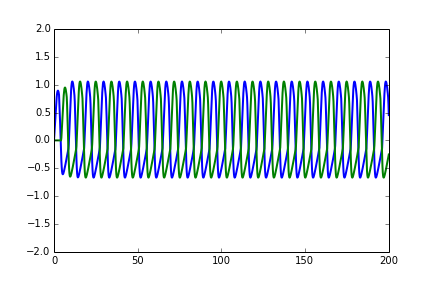
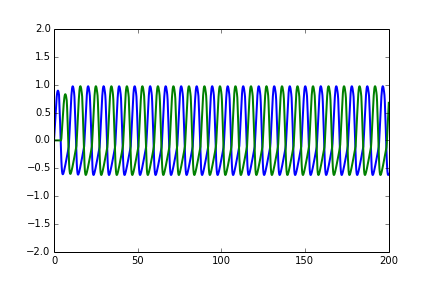
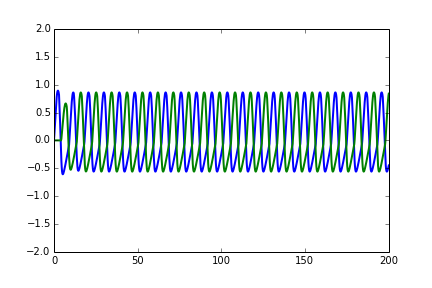
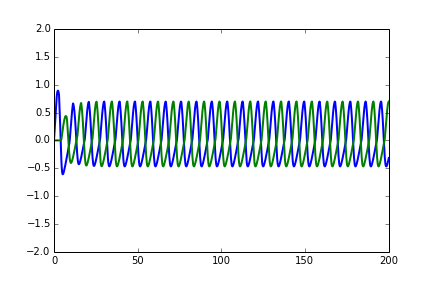
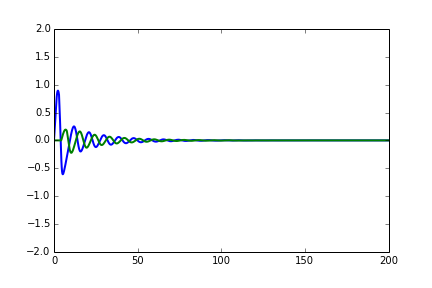
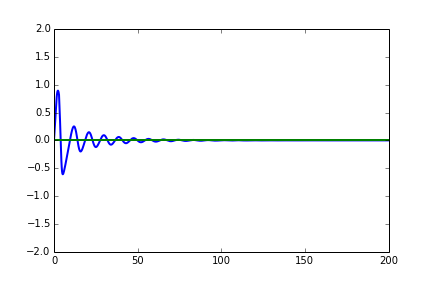

In [81]:
n_gamma = 10
gammas = np.linspace(0,1,n_gamma)
V1_loop = np.zeros((n_gamma,np.size(V1)))
V2_loop = np.zeros((n_gamma,np.size(V2)))
for ix,gamma in enumerate(gammas):
    p = [alpha, beta, c, z,gamma]
    w0 = [0,0,0,0]
    wsol = odeint(derr_func_coup, [0,0,0,0], times, args=([alpha,beta,c,0.5,gamma],),atol=abserr, rtol=relerr)
    V1 = wsol[:,0]
    V2 = wsol[:,1]
    V1_loop[ix,:] = V1
    V2_loop[ix,:] = V2
    

    
#First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0,200), ylim=(-2,2))

lines = []
for i in [0,1]:
    lines.append(ax.plot([],[],lw=2)[0])
def init():
        lines[0].set_data([], [])
        lines[1].set_data([], [])
        return lines,

def animate(i):
    V1 = V1_loop[i,:]
    V2 = V2_loop[i,:]
    lines[0].set_data(times,V1)
    lines[1].set_data(times,V2)
    return lines


animation.FuncAnimation(fig, animate, init_func=init,frames=n_gamma, interval=100, blit=True)

###$n$ coupled neurons

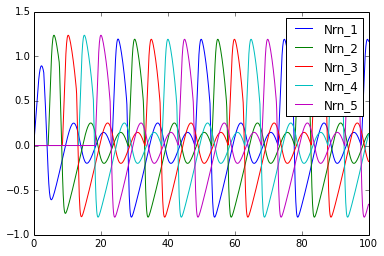

In [83]:
times = np.linspace(0,100,1000)
def derr_func_coup_bulk(var,t,p):
    alpha,beta,c,z,gamma = p
    #var = v1,v2,v3... w1,w2,w3...
    G_bar = 1
    x = np.zeros(len(var))
    n_nrn = len(var)/2.0
    vs = var[0:n_nrn]
    ws = var[n_nrn:]
    #vs = np.concatenate((vs,[vs[0]]))
    #ws = np.concatenate((ws,[ws[0]]))
    x[0] = (vs[0]*(alpha+vs[0])*(1-vs[0]))-ws[0]+(z*(t<3))+(G_bar*(1-gamma)*(vs[-1]<-0.3))#*((vs[0]-vs[-1])>0)
    x[0+n_nrn] = beta*vs[0] - c*ws[0]
    for i in np.arange(1,n_nrn):
        x[i] = (vs[i]*(alpha+vs[i])*(1-vs[i]))-ws[i]+(G_bar*(1-gamma)*(vs[i-1]<-0.3))#*((vs[i]-vs[i-1])>0)
        x[i+n_nrn] = beta*vs[i] - c*ws[i]
    return x

gamma = 0
n_nrn = 5


p = [alpha, beta, c, 0.5,gamma]
w = np.zeros(n_nrn*2)
wsol = odeint(derr_func_coup_bulk,w, times, args=(p,),atol=abserr, rtol=relerr)
VS = wsol[:,:n_nrn]
names = []
for i in np.arange(n_nrn):
    names.append('Nrn_'+str(i+1))
plt.plot(times,VS)
plt.legend(names)

###Frequency - needs more work

2
3
4
5
6
7
8
9
10


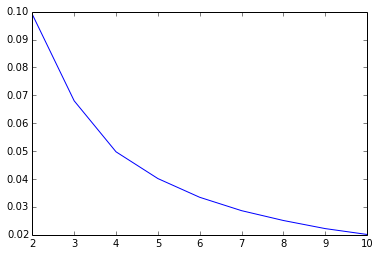

In [98]:
gamma = 0
n_max = 10

times = np.linspace(0,1000,10000)
VS = np.zeros((len(times),n_max-1))
nrns = np.zeros(n_max-1)
for i in np.arange(n_max-1):
    n_nrn = i+2
    print n_nrn
    nrns[i] = n_nrn
    p = [alpha, beta, c, 0.5,gamma]
    w = np.zeros(n_nrn*2)
    wsol = odeint(derr_func_coup_bulk,w, times, args=(p,),atol=abserr, rtol=relerr)
    VS[:,i] = wsol[:,0]
    
freqs = np.zeros(n_max-1)
for ix in np.arange(n_max-1):
    try:
        freqs[ix] = calc_freq(times,VS[:,ix])
    except:
        freqs[ix] = 0
plt.plot(nrns,freqs)

### Evolving $\nu_i$

In order to extend this model to model cardiac necrosis, we use the previously described coupling and add $\nu_i$ as an ordinary differential equation describing the dampening on neuron $i$ ($N_i$). In the present simplication, $\nu_i$ will depend only on time. Define $\nu_{0i}$ as the *a priori* necrotic burden of $N_i$. 

We wish to construct a model of $\nu_{i}$ evolution where, eventually, the disease will destroy the cell. Thus, we wish to have 1 (complete dampening) as a stable steady state. Additionally, we require that any concentration of $\nu_{0i}$ will eventually lead to cell death. We chose the model

$$ \frac{d \nu_i}{dt} = \dot{\nu} = \nu_i (1 - \nu_i) $$

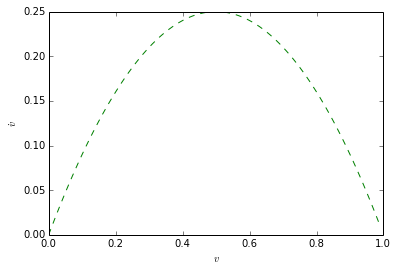

In [28]:
def delta_nu(nu):
    return nu*(1-nu)

nus=np.arange(0,1,0.01)
    
plt.plot(range,delta_nu(nus), 'g--',label='0')
plt.xlabel('$v$')
plt.ylabel('$\dot{v}$')

Moving this into the two neuron model for validation:

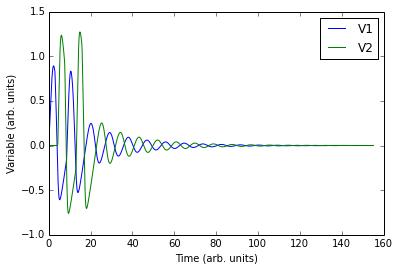

In [101]:
def derr_func_coup(var,t,p):
    alpha,beta,c,z = p
    V1,V2,W1,W2,nu_1,nu_2 = var
    G_bar = 1  #changing this makes a really big difference
    f = [V1*(alpha+V1)*(1-V1)-W1+z*(t<3)+G_bar*(1-nu_2)*(V2<-0.3), #reverse the nu's
         V2*(alpha+V2)*(1-V2)-W2+G_bar*(1-nu_1)*(V1<-0.3),
         beta*V1 - c*W1,
         beta*V2 - c*W2,
         nu_1*(1-nu_1),
         nu_2*(1-nu_2)]
    return f


times = np.linspace(0,155,1000)
p = [alpha, beta, c, z]
w0 = [0,0,0,0,0,0]
wsol = odeint(derr_func_coup, [0,0,0,0,0, 0.0001], times, args=([alpha,beta,c,0.5],),atol=abserr, rtol=relerr)
V1 = wsol[:,0]
V2 = wsol[:,1]
plt.plot(times,V1)
plt.plot(times,V2)
plt.xlabel('Time (arb. units)')
plt.ylabel('Variable (arb. units)')
plt.legend(['V1','V2'])

We can then extend this to $n$ neurons

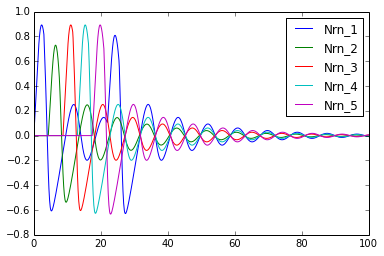

In [103]:
# dynamic nu extended to n neurons

times = np.linspace(0,100,1000)
def derr_func_coup_bulk(var,t,p):
    alpha,beta,c,z = p
    #var = v1,v2,v3... w1,w2,w3...
    G_bar = 0.5
    x = np.zeros(len(var))
    n_nrn = len(var)/3.0
    vs = var[0:n_nrn]
    ws = var[n_nrn:n_nrn*2]
    nus= var[n_nrn*2:]
    
    #vs = np.concatenate((vs,[vs[0]]))
    #ws = np.concatenate((ws,[ws[0]]))
    x[0] = (vs[0]*(alpha+vs[0])*(1-vs[0]))-ws[0]+(z*(t<3))+(G_bar*(1-nus[0])*(vs[-1]<-0.3))#*((vs[0]-vs[-1])>0)
    x[0+n_nrn] = beta*vs[0] - c*ws[0]
    for i in np.arange(1,n_nrn):
        x[i] = (vs[i]*(alpha+vs[i])*(1-vs[i]))-ws[i]+(G_bar*(1-nus[i])*(vs[i-1]<-0.3))#*((vs[i]-vs[i-1])>0)
        x[i+n_nrn] = beta*vs[i] - c*ws[i]
        x[i+2*n_nrn] = nus[i]*(1-nus[i])
    return x

gamma = 0
n_nrn = 5
p = [alpha, beta, c, 0.5]
w = np.zeros(n_nrn*3.0)

#################################
# just declare initial nus here #
# for nu i, index i+2n_nrns     #
#################################

#5 for now
w[2*n_nrn+1] = 0.001
w[2*n_nrn+2] = 0
w[2*n_nrn+3] = 0
w[2*n_nrn+4] = 0
w[2*n_nrn] = 0


wsol = odeint(derr_func_coup_bulk,w, times, args=(p,),atol=abserr, rtol=relerr)
VS = wsol[:,:n_nrn]
names = []
for i in np.arange(n_nrn):
    names.append('Nrn_'+str(i+1))
plt.plot(times,VS)
plt.legend(names)

###Time to death... hi there Chris